In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Library**

In [ ]:
#install libraries
!pip install emot
!pip install pyspellchecker
!pip install textblob
!pip install wordcloud
!pip install tensorflow
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 16 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 4.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import gensim.parsing.preprocessing as gp
import sklearn.metrics as metrics
import pickle
import plotly.graph_objs as go
import cufflinks as cf

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from matplotlib import rcParams
from plotly import tools
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# **Dataset Description**

In [ ]:
#read dataset
path = '/content/drive/Shareddrives/Thesis(Group-4008)/Final Defense(4.2)/Dataset/Experimental/Automotive_5.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car...,5,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but ...",4,Okay long cables,1315094400,"09 04, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",Can't comment much on these since they have no...,5,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",I absolutley love Amazon!!! For the price of ...,5,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",I purchased the 12' feet long cable set and th...,5,"Excellent, High Quality Starter Cables",1341360000,"07 04, 2012"


In [ ]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
20468,A1KB43BI085A48,B00KIAQ8VW,Mike F.,"[1, 1]",I've bought 10 of these over the past year to ...,5,Excellent quality for the price,1396915200,"04 08, 2014"
20469,A3HIUWKL4D853W,B00KIAQ8VW,RayH,"[0, 0]","OK, I have to admit, the price of this item di...",2,Light weight neck and face cover with whimsica...,1391472000,"02 04, 2014"
20470,A1S95WASXJ02VX,B00KIAQ8VW,Roberto Aguilar Jr.,"[0, 0]",I love my skull face mask. It makes me outstan...,5,I love to ride with my Skull Face Mask.,1386547200,"12 9, 2013"
20471,A2IID0Z6EHF5KP,B00KIAQ8VW,Soarer,"[0, 0]",This mask of course as described is half-face ...,5,Great neck protection,1357171200,"01 03, 2013"
20472,A3HKZTFCPIK2OE,B00KIAQ8VW,"SSG Barnes (ABN) ""James C. Barnes""","[0, 0]",Good light weight for just cool nights or rain...,5,FACE MASK,1395100800,"03 18, 2014"


In [ ]:
print("Total number of reviews:", len(df))
df.info()

Total number of reviews: 20473
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20473 entries, 0 to 20472
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      20473 non-null  object
 1   asin            20473 non-null  object
 2   reviewerName    20260 non-null  object
 3   helpful         20473 non-null  object
 4   reviewText      20467 non-null  object
 5   overall         20473 non-null  int64 
 6   summary         20473 non-null  object
 7   unixReviewTime  20473 non-null  int64 
 8   reviewTime      20473 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      213
helpful             0
reviewText          6
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [ ]:
df.describe()

,overall,unixReviewTime
count,20473.000000,2.047300e+04
mean,4.471841,1.365018e+09
std,0.940337,3.621266e+07
min,1.000000,1.121386e+09
25%,4.000000,1.354838e+09
50%,5.000000,1.373414e+09
75%,5.000000,1.390435e+09
max,5.000000,1.405901e+09


In [ ]:
df.describe(include=object)

,reviewerID,asin,reviewerName,helpful,reviewText,summary,reviewTime
count,20473,20473,20260,20473,20467,20473,20473
unique,2928,1835,2788,380,20467,17225,1855
top,A2V1J3JT5OOZFO,B000CITK8S,Amazon Customer,"[0, 0]",I needed a set of jumper cables for my new car...,Five Stars,"07 08, 2014"
freq,51,169,173,12844,1,95,82


In [ ]:
df['reviewText'] = df['reviewText'] + df['summary']
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car...,5,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but ...",4,Okay long cables,1315094400,"09 04, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",Can't comment much on these since they have no...,5,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",I absolutley love Amazon!!! For the price of ...,5,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",I purchased the 12' feet long cable set and th...,5,"Excellent, High Quality Starter Cables",1341360000,"07 04, 2012"


# **Data Preprocessing**

In [ ]:
dataset = df[['overall','reviewText']]
dataset.head()

,overall,reviewText
0,5,I needed a set of jumper cables for my new car...
1,4,"These long cables work fine for my truck, but ..."
2,5,Can't comment much on these since they have no...
3,5,I absolutley love Amazon!!! For the price of ...
4,5,I purchased the 12' feet long cable set and th...


In [ ]:
#converting text from upper case to lower case
dataset['lower_text'] = dataset['reviewText'].astype(str).apply(lambda x: x.lower())
dataset.head()

,overall,reviewText,lower_text
0,5,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...
1,4,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ..."
2,5,Can't comment much on these since they have no...,can't comment much on these since they have no...
3,5,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...
4,5,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...


In [ ]:
from emot.emo_unicode import EMOTICONS_EMO

#function for converting emoticons into text
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
          text = text.replace(emot, EMOTICONS_EMO[emot].replace(" "," "))
    return text

#storing text with converted emoticons
dataset['converted_emoticons'] = dataset['lower_text'].apply(lambda x:convert_emoticons(x))
dataset.head()

,overall,reviewText,lower_text,converted_emoticons
0,5,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...
1,4,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ..."
2,5,Can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...
3,5,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...
4,5,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...


In [ ]:
from emot.emo_unicode import UNICODE_EMOJI

#function for converting emoticons into text
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
          text = text.replace(emot, UNICODE_EMOJI[emot].replace(" "," "))
    return text

#storing text with converted emoticons
dataset['converted_emojis'] = dataset['converted_emoticons'].apply(lambda x:convert_emojis(x))
dataset.head()

,overall,reviewText,lower_text,converted_emoticons,converted_emojis
0,5,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...
1,4,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ..."
2,5,Can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...
3,5,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...
4,5,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...


In [ ]:
#library for punctuation
string.punctuation

#function to remove punctuation from reviewText
def remove_punctuation(text):
    noPunctuation = "".join([i for i in text if i not in string.punctuation])
    return noPunctuation

#storing text without punctuation
dataset['no_punctuation'] = dataset['converted_emojis'].apply(lambda x:remove_punctuation(x))
dataset.head()

,overall,reviewText,lower_text,converted_emoticons,converted_emojis,no_punctuation
0,5,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...
1,4,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...",these long cables work fine for my truck but t...
2,5,Can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,cant comment much on these since they have not...
3,5,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon for the price of a s...
4,5,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12 feet long cable set and the...


In [ ]:
#function for tokenization
def tokenization(text):
    tokenized = re.split('\W+',text)
    return tokenized

#storing tokenied text
dataset['tokenized_text'] = dataset['no_punctuation'].apply(lambda x: tokenization(x))
dataset.head()

,overall,reviewText,lower_text,converted_emoticons,converted_emojis,no_punctuation,tokenized_text
0,5,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,"[i, needed, a, set, of, jumper, cables, for, m..."
1,4,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...",these long cables work fine for my truck but t...,"[these, long, cables, work, fine, for, my, tru..."
2,5,Can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,cant comment much on these since they have not...,"[cant, comment, much, on, these, since, they, ..."
3,5,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon for the price of a s...,"[i, absolutley, love, amazon, for, the, price,..."
4,5,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12 feet long cable set and the...,"[i, purchased, the, 12, feet, long, cable, set..."


In [ ]:
#library for lemmatization
from nltk.stem import WordNetLemmatizer 

#object for lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#function for lemmatization
def lemmatizer(text):
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemmatized

dataset['lemmatized_text'] = dataset['tokenized_text'].apply(lambda x:lemmatizer(x))
dataset.head()



,overall,reviewText,lower_text,converted_emoticons,converted_emojis,no_punctuation,tokenized_text,lemmatized_text
0,5,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,"[i, needed, a, set, of, jumper, cables, for, m...","[i, needed, a, set, of, jumper, cable, for, my..."
1,4,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...",these long cables work fine for my truck but t...,"[these, long, cables, work, fine, for, my, tru...","[these, long, cable, work, fine, for, my, truc..."
2,5,Can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,cant comment much on these since they have not...,"[cant, comment, much, on, these, since, they, ...","[cant, comment, much, on, these, since, they, ..."
3,5,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon for the price of a s...,"[i, absolutley, love, amazon, for, the, price,...","[i, absolutley, love, amazon, for, the, price,..."
4,5,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12 feet long cable set and the...,"[i, purchased, the, 12, feet, long, cable, set...","[i, purchased, the, 12, foot, long, cable, set..."


In [ ]:
#function to convert list to string
def listToString(s): 
    str = " "
    str = str.join(s) 
    return (str)
        
dataset['final_text'] = dataset['lemmatized_text'].apply(lambda x:listToString(x))
dataset.head() 

,overall,reviewText,lower_text,converted_emoticons,converted_emojis,no_punctuation,tokenized_text,lemmatized_text,final_text
0,5,I needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,i needed a set of jumper cables for my new car...,"[i, needed, a, set, of, jumper, cables, for, m...","[i, needed, a, set, of, jumper, cable, for, my...",i needed a set of jumper cable for my new car ...
1,4,"These long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...","these long cables work fine for my truck, but ...",these long cables work fine for my truck but t...,"[these, long, cables, work, fine, for, my, tru...","[these, long, cable, work, fine, for, my, truc...",these long cable work fine for my truck but th...
2,5,Can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,can't comment much on these since they have no...,cant comment much on these since they have not...,"[cant, comment, much, on, these, since, they, ...","[cant, comment, much, on, these, since, they, ...",cant comment much on these since they have not...
3,5,I absolutley love Amazon!!! For the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon!!! for the price of ...,i absolutley love amazon for the price of a s...,"[i, absolutley, love, amazon, for, the, price,...","[i, absolutley, love, amazon, for, the, price,...",i absolutley love amazon for the price of a se...
4,5,I purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12' feet long cable set and th...,i purchased the 12 feet long cable set and the...,"[i, purchased, the, 12, feet, long, cable, set...","[i, purchased, the, 12, foot, long, cable, set...",i purchased the 12 foot long cable set and the...


In [ ]:
dataset = dataset [['overall','final_text']]
dataset.head()

,overall,final_text
0,5,i needed a set of jumper cable for my new car ...
1,4,these long cable work fine for my truck but th...
2,5,cant comment much on these since they have not...
3,5,i absolutley love amazon for the price of a se...
4,5,i purchased the 12 foot long cable set and the...


In [ ]:
#creating corpus
corpus = [] 

for i in range(0,len(dataset)):
    review = re.sub('[^a-zA-Z#]', ' ', dataset['final_text'][i])    
    review = ''.join(review)
    corpus.append(review) 
    
print("After preproccessing:", review)

After preproccessing: good light weight for just cool night or rain in a half helmet almost like not wearing one it is so lightface mask


# **Data Visualization**

In [ ]:
#copying main dataset for plotting purpose
df_p = df.copy()
df_p.head()
#no of positive and negative reviews
review_type=df_p['overall'].value_counts()
print(review_type)

5    13928
4     3967
3     1430
2      606
1      542
Name: overall, dtype: int64


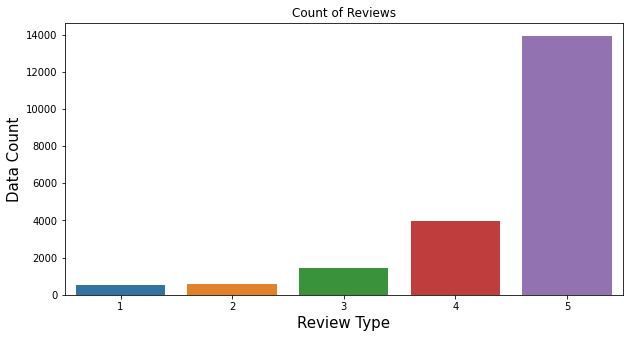

In [ ]:
ax = sns.countplot(x='overall', data=df_p)
#Setting labels and font size
ax.set(xlabel='Review Type', ylabel='Data Count',title='Count of Reviews')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

In [ ]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [ ]:
#Applying the function in our new column
dataset['Sentiment'] = dataset.apply(sent, axis=1)
dataset.head()

,overall,final_text,Sentiment
0,5,i needed a set of jumper cable for my new car ...,Positive
1,4,these long cable work fine for my truck but th...,Positive
2,5,cant comment much on these since they have not...,Positive
3,5,i absolutley love amazon for the price of a se...,Positive
4,5,i purchased the 12 foot long cable set and the...,Positive


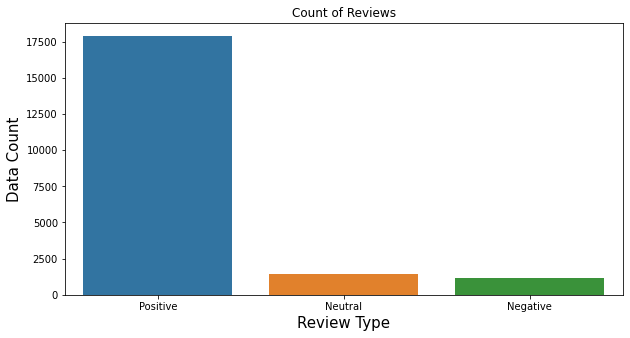

In [ ]:
ax = sns.countplot(x='Sentiment', data=dataset)
#Setting labels and font size
ax.set(xlabel='Review Type', ylabel='Data Count',title='Count of Reviews')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

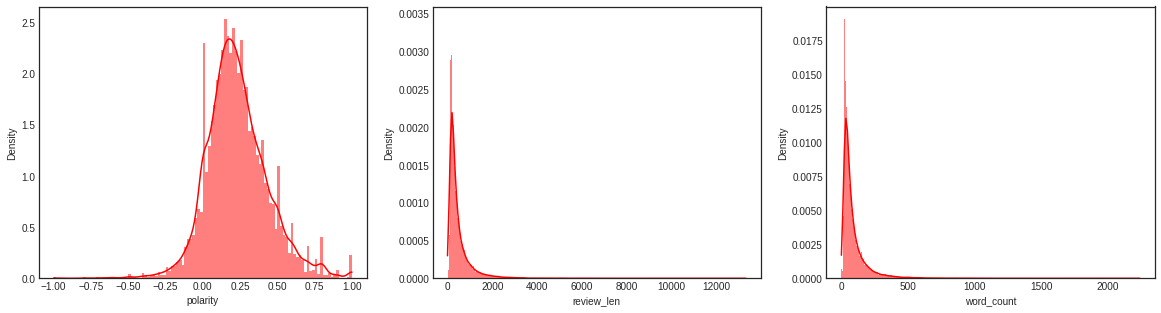

In [ ]:
#Extracting the features from the news
df_p['polarity'] = df_p['reviewText'].astype(str).map(lambda text: TextBlob(text).sentiment.polarity)
df_p['review_len'] = df_p['reviewText'].astype(str).apply(len)
df_p['word_count'] = df_p['reviewText'].astype(str).apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.xlim(1, 4)
plt.style.use('seaborn-white')
plt.subplot(131)
sns.histplot(df_p['polarity'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
fig = plt.gcf()
plt.subplot(132)
sns.histplot(df_p['review_len'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
fig = plt.gcf()
plt.subplot(133)
sns.histplot(df_p['word_count'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
fig = plt.gcf()

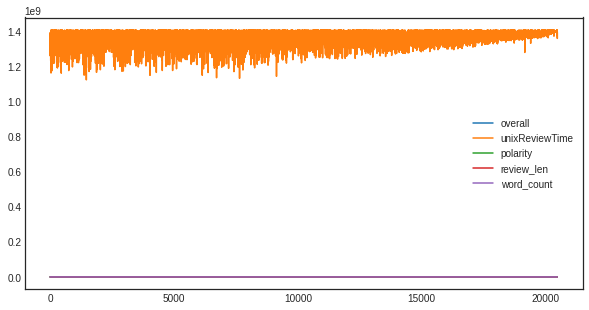

In [ ]:
#plot
df_p.plot()
plt.show()


In [ ]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(corpus, 20)

#Creating the dataframe of word and frequency
freq_word = pd.DataFrame(common_words, columns = ['Word', 'Frequency'])
print(freq_word)

    Word  Frequency
0    the      93063
1    and      51366
2     to      50638
3     it      45511
4     is      25478
5     of      25474
6   this      24230
7    for      22976
8     in      20002
9     on      19713
10    my      19169
11  that      16718
12   you      16246
13  with      15964
14  have      13580
15   but      12815
16   not      11828
17   are       9714
18   car       9438
19    wa       9391


In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', 'when', 'just', 'that', 'were', 
             'very', 'should', 'any', 'y', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all', 'two', 'one', 'three', 'four', 'five']

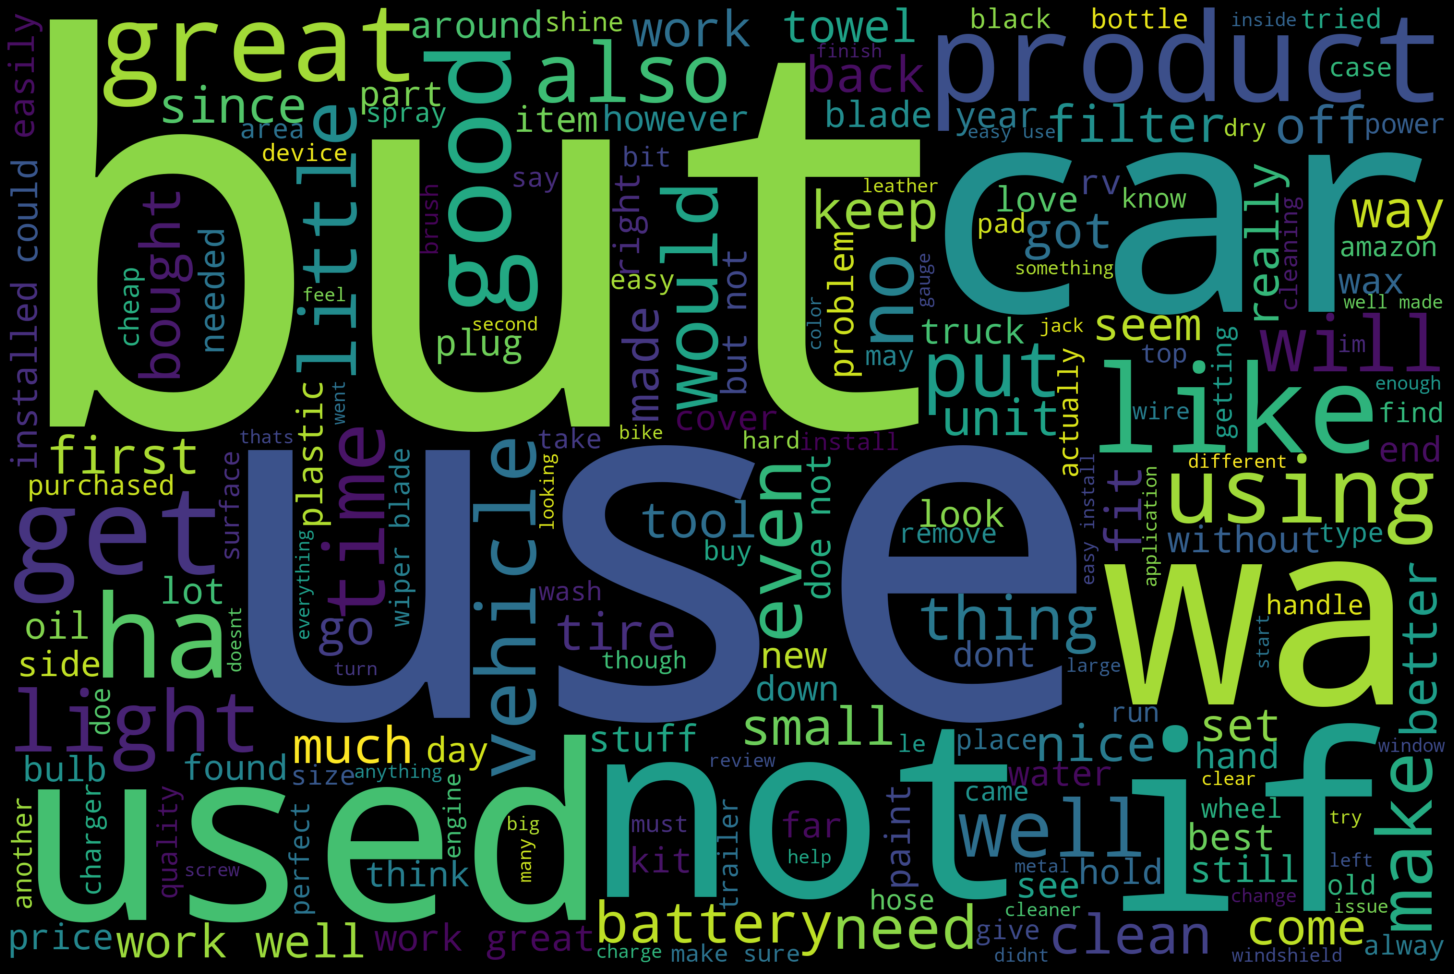

In [ ]:
#text = df_p["reviewText"]
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = stop_words).generate(str(corpus))
fig = plt.figure(figsize = (20, 20), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

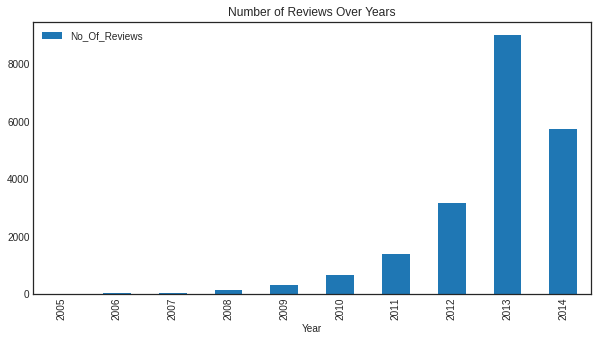

In [ ]:
# Converting the data type of 'Review_Time' column in the Dataframe 'POI' to datetime format.
df_p['reviewTime']= pd.to_datetime(df_p['reviewTime'])

# Creating an Addtional column as 'Month' in Datatframe 'POI' for Month by taking the month part of 'Review_Time' column.
df_p['Month']=df_p['reviewTime'].dt.month

# Creating an Addtional column as 'Year' in Datatframe 'POI' for Year by taking the year part of 'Review_Time' column.
df_p['Year']=df_p['reviewTime'].dt.year

# Creating an Addtional column as 'Day' in Datatframe 'POI' for Year by taking the year part of 'Review_Time' column.
df_p['Day']=df_p['reviewTime'].dt.day

YearlyCount=df_p.groupby('Year')['overall'].count().reset_index()
YearlyCount=YearlyCount.rename(columns={'overall':'No_Of_Reviews'})
YearlyCount.head()

# Taking into .csv and plot
YearlyCount.to_csv('/content/drive/Shareddrives/Thesis(Group-4008)/Final Defense(4.2)/Dataset/Temp/Yearly_Count.csv')

YearlyCount.plot(x="Year",y="No_Of_Reviews",kind="bar",title="Number of Reviews Over Years")
plt.show()

In [ ]:
#count of output based on year
year_review=df_p.groupby(['Year'])['overall'].count()

print(year_review)

Year
2005       3
2006      11
2007      45
2008     118
2009     307
2010     662
2011    1397
2012    3148
2013    9022
2014    5760
Name: overall, dtype: int64


In [ ]:
#neutral year
neutral=df_p[df_p.overall == 3]
neutral_Year=neutral.groupby('Year')['overall'].count().reset_index()
neutral_Year=neutral_Year.rename(columns={'overall':'No_Of_Neutral_Reviews'})

print(neutral_Year)

   Year  No_Of_Neutral_Reviews
0  2006                      1
1  2007                      1
2  2008                      8
3  2009                     27
4  2010                     44
5  2011                     92
6  2012                    238
7  2013                    637
8  2014                    382


   Year  No_Of_Neutral_Reviews  No_Of_Reviews  Percentage
0  2006                      1             11    9.090909
1  2007                      1             45    2.222222
2  2008                      8            118    6.779661
3  2009                     27            307    8.794788
4  2010                     44            662    6.646526
5  2011                     92           1397    6.585540
6  2012                    238           3148    7.560356
7  2013                    637           9022    7.060519
8  2014                    382           5760    6.631944


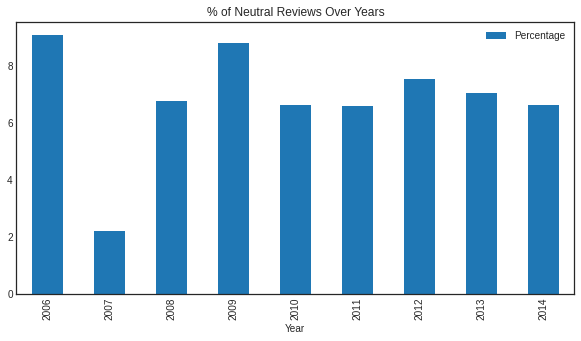

In [ ]:
neutral_Percentage=pd.merge(neutral_Year,YearlyCount,on='Year',how='inner')
neutral_Percentage['Percentage']=(neutral_Percentage['No_Of_Neutral_Reviews']/neutral_Percentage['No_Of_Reviews'])*100
print(neutral_Percentage)

# Taking into .csv and plot
neutral_Percentage.to_csv('/content/drive/Shareddrives/Thesis(Group-4008)/Final Defense(4.2)/Dataset/Temp/Neutral_Review_Percentage.csv')

neutral_Percentage.plot(x="Year",y="Percentage",kind="bar",title="% of Neutral Reviews Over Years")
plt.show()

In [ ]:
#positive year
pos=df_p[df_p.overall > 3]
pos_Year=pos.groupby('Year')['overall'].count().reset_index()
pos_Year=pos_Year.rename(columns={'overall':'No_Of_Pos_Reviews'})

print(pos_Year)

   Year  No_Of_Pos_Reviews
0  2005                  3
1  2006                  9
2  2007                 42
3  2008                102
4  2009                262
5  2010                566
6  2011               1223
7  2012               2702
8  2013               7910
9  2014               5076


   Year  No_Of_Pos_Reviews  No_Of_Reviews  Percentage
0  2005                  3              3  100.000000
1  2006                  9             11   81.818182
2  2007                 42             45   93.333333
3  2008                102            118   86.440678
4  2009                262            307   85.342020
5  2010                566            662   85.498489
6  2011               1223           1397   87.544739
7  2012               2702           3148   85.832274
8  2013               7910           9022   87.674573
9  2014               5076           5760   88.125000


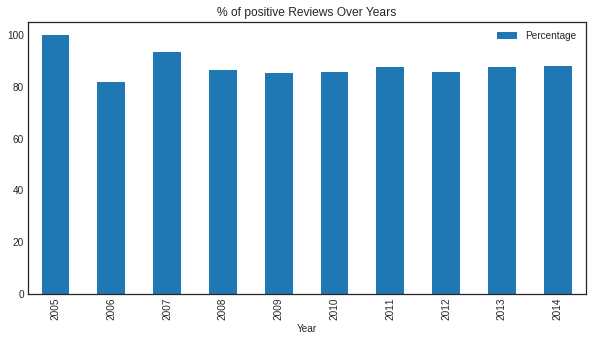

In [ ]:
pos_Percentage=pd.merge(pos_Year,YearlyCount,on='Year',how='inner')
pos_Percentage['Percentage']=(pos_Percentage['No_Of_Pos_Reviews']/pos_Percentage['No_Of_Reviews'])*100
print(pos_Percentage)

# Taking into .csv and plot
pos_Percentage.to_csv('/content/drive/Shareddrives/Thesis(Group-4008)/Final Defense(4.2)/Dataset/Temp/Positive_Review_Percentage.csv')

pos_Percentage.plot(x="Year",y="Percentage",kind="bar",title="% of positive Reviews Over Years")
plt.show()

In [ ]:
#negative year
neg=df_p[df_p.overall < 3]
neg_Year=neg.groupby('Year')['overall'].count().reset_index()
neg_Year=neg_Year.rename(columns={'overall':'No_Of_Neg_Reviews'})

print(neg_Year)

   Year  No_Of_Neg_Reviews
0  2006                  1
1  2007                  2
2  2008                  8
3  2009                 18
4  2010                 52
5  2011                 82
6  2012                208
7  2013                475
8  2014                302


   Year  No_Of_Neg_Reviews  No_Of_Reviews  Percentage
0  2006                  1             11    9.090909
1  2007                  2             45    4.444444
2  2008                  8            118    6.779661
3  2009                 18            307    5.863192
4  2010                 52            662    7.854985
5  2011                 82           1397    5.869721
6  2012                208           3148    6.607370
7  2013                475           9022    5.264908
8  2014                302           5760    5.243056


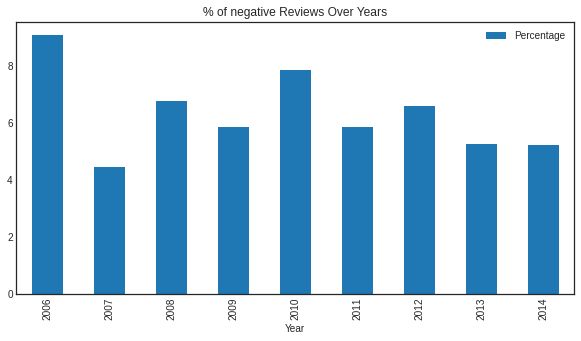

In [ ]:
neg_Percentage=pd.merge(neg_Year,YearlyCount,on='Year',how='inner')
neg_Percentage['Percentage']=(neg_Percentage['No_Of_Neg_Reviews']/neg_Percentage['No_Of_Reviews'])*100
print(neg_Percentage)

# Taking into .csv and plot
neg_Percentage.to_csv('/content/drive/Shareddrives/Thesis(Group-4008)/Final Defense(4.2)/Dataset/Temp/Negative_Review_Percentage.csv')

neg_Percentage.plot(x="Year",y="Percentage",kind="bar",title="% of negative Reviews Over Years")
plt.show()

# **Feature Extraction (BoW & TF-IDF)**

In [ ]:
#BoW (Bag of Words) model
bow = CountVectorizer(analyzer = "word", 
                      tokenizer = None, 
                      preprocessor = None, 
                      stop_words = None, 
                      max_features = None)
x1 = bow.fit_transform(corpus).toarray()
y1 = dataset.iloc[:, 0].values

# Data Splitting
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.20, random_state = 87)

In [ ]:
#TF-IDF (Term Frequency–Inverse Document Frequency) model
tfidf = TfidfVectorizer(min_df=0.0001, 
                        max_df=1., 
                        strip_accents='ascii',
                        stop_words='english')
x2 = tfidf.fit_transform(corpus).toarray()
y2 = dataset.iloc[:, 0].values
pickle.dump(tfidf, open('tranform.pkl', 'wb'))

# Data Splitting
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state = 42)

# **K-Fold**

In [ ]:
from sklearn.model_selection import KFold
# prepare the cross-validation
fold = KFold(n_splits=10, random_state=1, shuffle=True)

#**1. NB + BOW**


In [ ]:
NB_bow = MultinomialNB()
NB_bow.fit(x1_train, y1_train)

y1_pred = NB_bow.predict(x1_test)

print(metrics.classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      1578
           1       0.74      0.85      0.79      1600

    accuracy                           0.77      3178
   macro avg       0.78      0.77      0.77      3178
weighted avg       0.78      0.77      0.77      3178



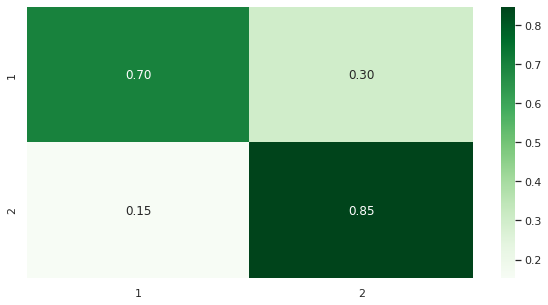

In [ ]:
# Making the Confusion Matrix
sns.set()
cm1 = confusion_matrix(y1_test, y1_pred, normalize='true')
sns.heatmap(cm1, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#performance metrices
accuracy1 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy1, 2))

precision1 = metrics.precision_score(y1_test,y1_pred)*100
print("Precision: ", round(precision1, 2))

recall1 = metrics.recall_score(y1_test,y1_pred)*100
print("Recall: ", round(recall1, 2))

f1_score1 = metrics.f1_score(y1_test,y1_pred)*100
print("F1 Score: ", round(f1_score1, 2))

Accuracy:  77.47
Precision:  74.15
Recall:  84.81
F1 Score:  79.13


In [ ]:
#cross-validation
cv1 = cross_val_score(NB_bow, x1, y1, cv=fold, scoring='accuracy', n_jobs=-10)*100
print(cv1)
print("Cross Validation:", round(cv1.mean(), 2))

[79.04342354 78.47702958 79.67275016 80.36500944 78.03650094 78.6028949
 78.66582756 78.71536524 79.78589421 78.08564232]
Cross Validation: 78.95


***NB + BOW***
---
1.   Accurary = 77.78%
2.   Precision = 73.90%
3.   Recall = 86.38%
4.   F1 Score = 79.65%
5.   Cross-Validation = 78.76%

#**2. NB + TF-IDF**


In [ ]:
NB_tfidf = MultinomialNB()
NB_tfidf.fit(x2_train, y2_train)

y2_pred = NB_tfidf.predict(x2_test)

print(metrics.classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1546
           1       0.79      0.81      0.80      1632

    accuracy                           0.79      3178
   macro avg       0.79      0.79      0.79      3178
weighted avg       0.79      0.79      0.79      3178



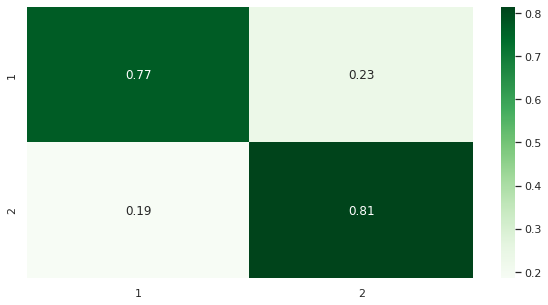

In [ ]:
# Making the Confusion Matrix
sns.set()
cm2 = confusion_matrix(y2_test, y2_pred, normalize='true')
sns.heatmap(cm2, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#performance metrices
accuracy2 = metrics.accuracy_score(y2_test,y2_pred)*100
print("Accuracy: ", round(accuracy2, 2))

precision2 = metrics.precision_score(y2_test,y2_pred)*100
print("Precision: ", round(precision2, 2))

recall2 = metrics.recall_score(y2_test,y2_pred)*100
print("Recall: ", round(recall2, 2))

f1_score2 = metrics.f1_score(y2_test,y2_pred)*100
print("F1 Score:", round(f1_score2, 2))

Accuracy:  79.17
Precision:  78.7
Recall:  81.5
F1 Score: 80.07


In [ ]:
#cross-validation
cv2 = cross_val_score(NB_tfidf, x2, y2, cv=fold, scoring='accuracy', n_jobs=-10)*100
print(cv2)
print("Cross Validation:", round(cv2.mean(), 2))

[78.16236627 78.53996224 79.29515419 79.92448081 77.65890497 79.6098175
 78.22529893 78.52644836 79.97481108 78.90428212]
Cross Validation: 78.88


***NB + TF-IDF***
---
1.   Accurary = 79.23%
2.   Precision = 78.76%
3.   Recall = 81.56%
4.   F1 Score = 80.13%
5.   ✔Cross-Validation = 78.91%

# **3. KNN + BOW**

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy1 = np.empty(len(neighbors))
test_accuracy1 = np.empty(len(neighbors))

#loop over K values
for i, k in enumerate(neighbors):
    KNN_bow = KNeighborsClassifier(n_neighbors=k)
    KNN_bow.fit(x1_train, y1_train)
     
    #compute training and test data accuracy
    train_accuracy1[i] = KNN_bow.score(x1_train, y1_train)
    test_accuracy1[i] = KNN_bow.score(x1_test, y1_test)

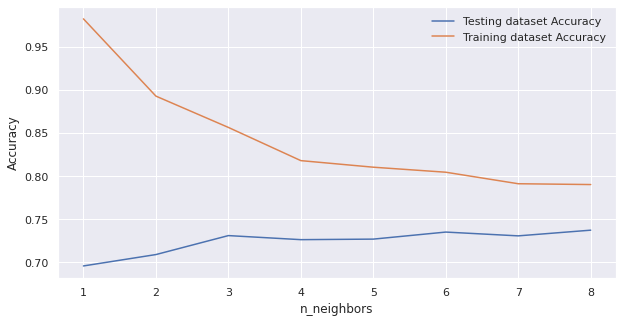

In [ ]:
#generate plot for accuracy
plt.plot(neighbors, test_accuracy1, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy1, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Using k=6 to get the highest accuracy

In [ ]:
KNN_bow = KNeighborsClassifier(n_neighbors=6)
KNN_bow.fit(x1_train, y1_train)

y1_pred = KNN_bow.predict(x1_test)

print(metrics.classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1578
           1       0.75      0.71      0.73      1600

    accuracy                           0.73      3178
   macro avg       0.74      0.73      0.73      3178
weighted avg       0.74      0.73      0.73      3178



In [ ]:
#performance metrices
accuracy3 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy3, 2))

precision3 = metrics.precision_score(y1_test,y1_pred)*100
print("Precision: ", round(precision3, 2))

recall3 = metrics.recall_score(y1_test,y1_pred)*100
print("Recall: ", round(recall3, 2))

f1_score3 = metrics.f1_score(y1_test,y1_pred)*100
print("F1 Score:", round(f1_score3, 2))

Accuracy:  73.47
Precision:  74.75
Recall:  71.44
F1 Score: 73.06


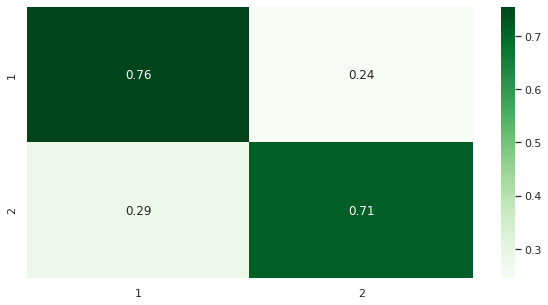

In [ ]:
#making the Confusion Matrix
sns.set()
cm3 = confusion_matrix(y1_test, y1_pred, normalize='true')
sns.heatmap(cm3, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#cross-validation
cv3 = cross_val_score(KNN_bow, x1, y1, cv=fold, scoring='accuracy', n_jobs=-10)*100
print(cv3)
print("Cross Validation:", round(cv3.mean(), 2))

[73.44241661 74.19760856 73.69414726 73.06482064 74.57520453 70.92511013
 73.19068597 72.98488665 74.55919395 73.3627204 ]
Cross Validation: 73.4


***KNN + BOW***
---
1.   Accurary = 73.47%
2.   Precision = 71.30%
3.   Recall = 79.19%
4.   F1 Score = 75.04%
5.   Cross-Validation = 72.75%









# **4. KNN + TF-IDF**

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy2 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))

#loop over K values
for i, k in enumerate(neighbors):
    KNN_tfidf = KNeighborsClassifier(n_neighbors=k)
    KNN_tfidf.fit(x2_train, y2_train)
     
    #compute training and test data accuracy
    train_accuracy2[i] = KNN_tfidf.score(x2_train, y2_train)
    test_accuracy2[i] = KNN_tfidf.score(x2_test, y2_test)

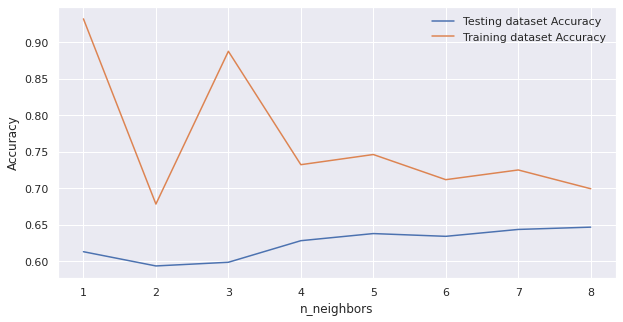

In [ ]:
#generate plot for accuracy
plt.plot(neighbors, test_accuracy2, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy2, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Using k=7 to get the highest accuracy

In [ ]:
KNN_tfidf = KNeighborsClassifier(n_neighbors=7)
KNN_tfidf.fit(x2_train, y2_train)

y2_pred = KNN_tfidf.predict(x2_test)

print(metrics.classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.61      0.73      0.66      1546
           1       0.69      0.57      0.62      1632

    accuracy                           0.64      3178
   macro avg       0.65      0.65      0.64      3178
weighted avg       0.65      0.64      0.64      3178



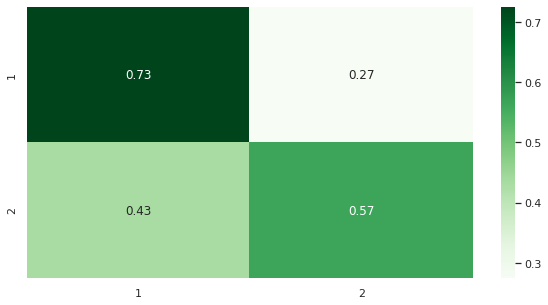

In [ ]:
#making the Confusion Matrix
sns.set()
cm4 = confusion_matrix(y2_test, y2_pred, normalize='true')
sns.heatmap(cm4, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#performance metrices
accuracy4 = metrics.accuracy_score(y2_test,y2_pred)*100
print("Accuracy: ", round(accuracy4, 2))

precision4 = metrics.precision_score(y2_test,y2_pred)*100
print("Precision: ", round(precision4, 2))

recall4 = metrics.recall_score(y2_test,y2_pred)*100
print("Recall: ", round(recall4, 2))

f1_score4 = metrics.f1_score(y2_test,y2_pred)*100
print("F1 Score:", round(f1_score4, 2))

Accuracy:  64.35
Precision:  68.52
Recall:  56.56
F1 Score: 61.97


In [ ]:
#cross-validation
cv4 = cross_val_score(KNN_tfidf, x2, y2, cv=fold, scoring='accuracy', n_jobs=-10)*100
print(cv4)
print("Cross Validation:", round(cv4.mean(), 2))

[63.43612335 64.06544997 62.24040277 61.61107615 61.10761485 63.56198867
 63.687854   63.7279597  65.36523929 62.0906801 ]
Cross Validation: 63.09


***KNN + TF-IDF***
---
1.   Accurary = 62.78%
2.   Precision = 67.53%
3.   Recall = 53.0%
4.   F1 Score = 59.39%
5.   ✔Cross-Validation = 62.96%

# **5. LR + BOW**

In [ ]:
LR_bow = LogisticRegression(max_iter=10000)
LR_bow.fit(x1_train,y1_train)
y1_pred = LR_bow.predict(x1_test)
print(metrics.classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1578
           1       0.82      0.80      0.81      1600

    accuracy                           0.81      3178
   macro avg       0.81      0.81      0.81      3178
weighted avg       0.81      0.81      0.81      3178



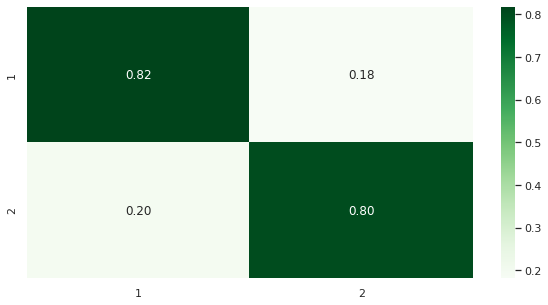

In [ ]:
#making the Confusion Matrix
sns.set()
cm5 = confusion_matrix(y1_test, y1_pred, normalize='true')
sns.heatmap(cm5, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#performance metrices
accuracy5 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy5, 2))

precision5 = metrics.precision_score(y1_test,y1_pred)*100
print("Precision: ", round(precision5, 2))

recall5 = metrics.recall_score(y1_test,y1_pred)*100
print("Recall: ", round(recall5, 2))

f1_score5 = metrics.f1_score(y1_test,y1_pred)*100
print("F1 Score:", round(f1_score5, 2))

Accuracy:  81.06
Precision:  81.78
Recall:  80.25
F1 Score: 81.01


In [ ]:
#cross-validation
cv5 = cross_val_score(LR_bow, x1, y1, cv=fold, scoring='accuracy', n_jobs=-10)*100
print(cv5)
print("Cross Validation:", round(cv5.mean(), 2))

[79.54688483 82.88231592 82.31592196 82.56765261 80.49087476 80.86847074
 79.86154814 80.98236776 82.05289673 80.6675063 ]
Cross Validation: 81.22


***LR + BOW***
---
1.   Accurary = 80.93%
2.   Precision = 81.54%
3.   Recall = 80.31%
4.   F1 Score = 80.92%
5.   Cross-Validation = 80.86%


# **6. LR + TF-IDF**

In [ ]:
LR_tfidf = LogisticRegression(max_iter=10000)
LR_tfidf.fit(x2_train,y2_train)

y2_pred = LR_tfidf.predict(x2_test)

print(metrics.classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1546
           1       0.81      0.79      0.80      1632

    accuracy                           0.80      3178
   macro avg       0.80      0.80      0.80      3178
weighted avg       0.80      0.80      0.80      3178



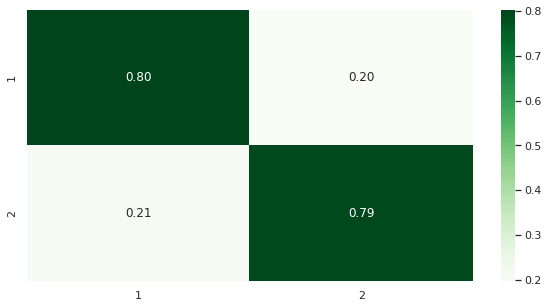

In [ ]:
#making the Confusion Matrix
sns.set()
cm6 = confusion_matrix(y2_test, y2_pred, normalize='true')
sns.heatmap(cm6, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#performance metrices
accuracy6 = metrics.accuracy_score(y2_test,y2_pred)*100
print("Accuracy: ", round(accuracy6, 2))

precision6 = metrics.precision_score(y2_test,y2_pred)*100
print("Precision: ", round(precision6, 2))

recall6 = metrics.recall_score(y2_test,y2_pred)*100
print("Recall: ", round(recall6, 2))

f1_score6 = metrics.f1_score(y2_test,y2_pred)*100
print("F1 Score:", round(f1_score6, 2))

Accuracy:  79.83
Precision:  80.99
Recall:  79.35
F1 Score: 80.16


In [ ]:
#cross-validation
cv6 = cross_val_score(LR_tfidf, x2, y2, cv=fold, scoring='accuracy', n_jobs=-10)*100
print(cv6)
print("Cross Validation:", round(cv6.mean(), 2))

[79.1063562  79.54688483 80.11327879 81.24606671 78.6028949  79.98741347
 78.85462555 79.78589421 80.47858942 79.15617128]
Cross Validation: 79.69


***LR + TF-IDF***
---
1.   Accurary = 79.64%
2.   Precision = 80.76%
3.   Recall = 79.23%
4.   F1 Score = 79.99%
5.   ✔Cross-Validation = 79.69%


#**7. SVM + BOW**

In [ ]:
SVM_bow = SVC(kernel="linear", probability=True, random_state=0)
SVM_bow.fit(x1_train,y1_train)

y1_pred = SVM_bow.predict(x1_test)

print(metrics.classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1578
           1       0.81      0.81      0.81      1600

    accuracy                           0.81      3178
   macro avg       0.81      0.81      0.81      3178
weighted avg       0.81      0.81      0.81      3178



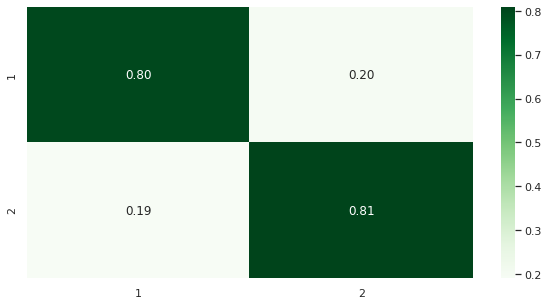

In [ ]:
# Making the Confusion Matrix
sns.set()
cm7 = confusion_matrix(y1_test, y1_pred, normalize='true')
sns.heatmap(cm7, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#performance metrices
accuracy7 = metrics.accuracy_score(y1_test,y1_pred)*100
print("Accuracy: ", round(accuracy7, 2))

precision7 = metrics.precision_score(y1_test,y1_pred)*100
print("Precision: ", round(precision7, 2))

recall7 = metrics.recall_score(y1_test,y1_pred)*100
print("Recall: ", round(recall7, 2))

f1_score7 = metrics.f1_score(y1_test,y1_pred)*100
print("F1 Score:", round(f1_score7, 2))

Accuracy:  80.59
Precision:  80.55
Recall:  81.0
F1 Score: 80.77


In [ ]:
#cross-validation
cv7 = cross_val_score(SVM_bow, x1, y1, cv=fold, scoring='accuracy', n_jobs=-10)*100
print(cv7)
print("Cross Validation:", round(cv7.mean(), 2))

NameError: ignored

***SVM + BOW***
---
1.   Accurary = 80.24%
2.   Precision = 80.92%
3.   Recall = 79.50%
4.   F1 Score = 80.20%
5.   ✔Cross-Validation = 80.34%

#**8. SVM + TF-IDF**

In [ ]:
SVM_tfidf = SVC(kernel="linear", probability=True, random_state=0)
SVM_tfidf.fit(x2_train,y2_train)

y2_pred = SVM_tfidf.predict(x2_test)

print(metrics.classification_report(y2_test,y2_pred))

In [ ]:
#making the Confusion Matrix
sns.set()
cm8 = confusion_matrix(y2_test, y2_pred, normalize='true')
sns.heatmap(cm8, cmap='Greens', yticklabels=range(1,3), xticklabels=range(1,3), annot=True, fmt='.2f')
plt.show()

In [ ]:
#performance metrices
accuracy8 = metrics.accuracy_score(y2_test,y2_pred)*100
print("Accuracy: ", round(accuracy8, 2))

precision8 = metrics.precision_score(y2_test,y2_pred)*100
print("Precision: ", round(precision8, 2))

recall8 = metrics.recall_score(y2_test,y2_pred)*100
print("Recall: ", round(recall8, 2))

f1_score8 = metrics.f1_score(y2_test,y2_pred)*100
print("F1 Score:", round(f1_score8, 2))

In [ ]:
#cross-validation
cv8 = cross_val_score(NB_tfidf, x2, y2, cv=fold, scoring='accuracy', n_jobs=-1)*100
print(cv8)
print("Cross Validation:", round(cv8.mean(), 2))

***SVM + TF-IDF***
---
1.   Accurary = 79.74%
2.   Precision = 79.98%
3.   Recall = 80.76%
4.   F1 Score = 80.36%
5.   ✔Cross-Validation = 78.62%